In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("dataset_sdn.csv")

In [3]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [4]:
data.shape

(104345, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
data.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [7]:
data["src"].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [8]:
data["dst"].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [9]:
data["Protocol"].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [10]:
# Mapping de l'IP source
IP_Source_Mapping={
    "10.0.0.1":1,
    "10.0.0.2":2,
    "10.0.0.3":3,
    "10.0.0.4":4,
    "10.0.0.5":5,
    "10.0.0.6":6,
    "10.0.0.7":7,
    "10.0.0.8":8,
    "10.0.0.9":9,
    "10.0.0.10":10,
    "10.0.0.11":11,
    "10.0.0.12":12,
    "10.0.0.13":13,
    "10.0.0.14":14,
    "10.0.0.15":15,
    "10.0.0.16":16,
    "10.0.0.17":17,
    "10.0.0.18":18,
    "10.0.0.19":19,
    "10.0.0.20":20,
}

data["src"]= data["src"].map(IP_Source_Mapping)
    

In [11]:
data.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [12]:
#NOUS ALLONS APPLIQUE LE LABEL ENCODING
labeling_IP_dst= LabelEncoder()

In [13]:
data["dst"]= labeling_IP_dst.fit_transform(data["dst"])
data["Protocol"]= labeling_IP_dst.fit_transform(data["Protocol"])

In [14]:
data.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,16,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0
5,11425,1,2,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1402,0,0.0,0.0,0
6,11425,1,1,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,4,3665,3413,0,0.0,0.0,0
7,11425,1,1,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,1,3775,1492,0,0.0,0.0,0
8,11425,1,1,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,2,3845,1402,0,0.0,0.0,0
9,11425,1,2,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,4,354583059,4295,16578,0.0,16578.0,0


In [15]:
label_encoder = LabelEncoder()
data['src'] = label_encoder.fit_transform(data['src'])

In [16]:
data.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0
5,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1402,0,0.0,0.0,0
6,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,4,3665,3413,0,0.0,0.0,0
7,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,1,3775,1492,0,0.0,0.0,0
8,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,2,3845,1402,0,0.0,0.0,0
9,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,4,354583059,4295,16578,0.0,16578.0,0


In [17]:
data.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,4,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,1,15209,12720,1,1.0,2.0,0
104341,5262,3,4,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,3,15099,14693,1,1.0,2.0,0


AFFICHAGE DE LA MATRICE DE CORELATION 

<Axes: >

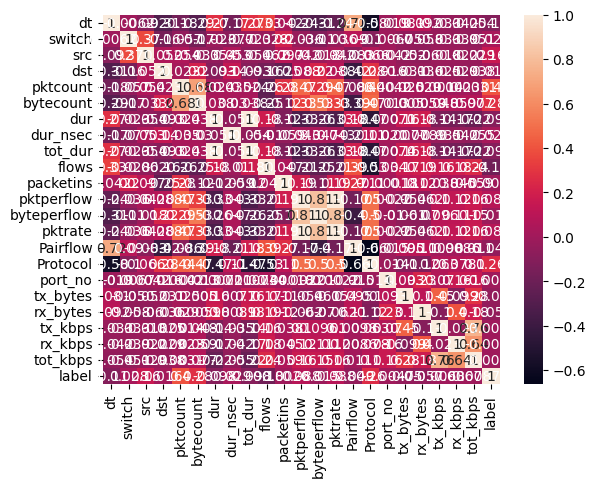

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.corr().label.sort_values(ascending=False)

label          1.000000
pktcount       0.401894
bytecount      0.277481
Protocol       0.258355
src            0.161170
pktrate        0.088013
pktperflow     0.087819
dur_nsec       0.029064
switch         0.028027
dst            0.016282
packetins     -0.002642
port_no       -0.004734
tx_kbps       -0.006297
rx_kbps       -0.006714
tot_kbps      -0.008748
byteperflow   -0.015192
Pairflow      -0.049159
tx_bytes      -0.050115
rx_bytes      -0.057490
dur           -0.098479
tot_dur       -0.098491
dt            -0.110126
flows         -0.182174
Name: label, dtype: float64

In [20]:
sub_data=data[["pktcount","bytecount","Protocol","src","pktrate","pktperflow","dur_nsec","switch","dst","label"]]

In [21]:
sub_data.head()

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,0,451,13535,716000000,1,16,0
1,126395,134737070,2,0,451,13531,734000000,1,16,0
2,90333,96294978,2,1,451,13534,744000000,1,16,0
3,90333,96294978,2,1,451,13534,744000000,1,16,0
4,90333,96294978,2,1,451,13534,744000000,1,16,0


In [22]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

SEPARATION DES DONNEES

In [23]:
print(sub_data.shape)
sub_data.head()

(104345, 10)


,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,0,451,13535,716000000,1,16,0
1,126395,134737070,2,0,451,13531,734000000,1,16,0
2,90333,96294978,2,1,451,13534,744000000,1,16,0
3,90333,96294978,2,1,451,13534,744000000,1,16,0
4,90333,96294978,2,1,451,13534,744000000,1,16,0


<Axes: >

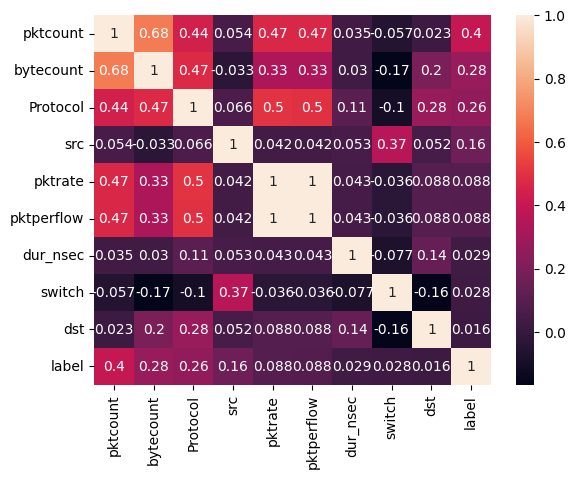

In [24]:
sns.heatmap(sub_data.corr(), annot=True)

In [25]:
#variable independante
X = data.iloc[:, :-1]
#Variable dependante
y = data.iloc[:, -1]

In [26]:
X

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,14428310,451,0,2,3,143928631,3917,0,0.0,0.0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,14424046,451,0,2,4,3842,3520,0,0.0,0.0
2,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,2,1,3795,1242,0,0.0,0.0
3,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,2,2,3688,1492,0,0.0,0.0
4,11425,1,1,16,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,2,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,4,15,79,7742,81,842000000,8.184200e+10,5,...,2842,0,0,0,1,15209,12720,1,1.0,2.0
104341,5262,3,4,15,79,7742,81,842000000,8.184200e+10,5,...,2842,0,0,0,3,15099,14693,1,1.0,2.0
104342,5262,3,10,13,31,3038,31,805000000,3.180500e+10,5,...,2940,1,0,0,2,3409,3731,0,0.0,0.0
104343,5262,3,10,13,31,3038,31,805000000,3.180500e+10,5,...,2940,1,0,0,1,15209,12720,1,1.0,2.0


In [27]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [29]:
#affichage des dimentions
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X train: (73041, 22)
y train: (73041,)
X test: (31304, 22)
y test: (31304,)


CREATION DES SHALLOW NEURAL NETWORK

In [30]:
#import tensorflow as tsf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [31]:
model=Sequential()

In [32]:
#ajout de le première couche couche d'entrée
model.add(Dense(10, input_shape=(22,),activation="relu"))

#couche de sortie
model.add(Dense(1,activation="sigmoid"))

#compile le model
model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy",metrics=["accuracy"])

#affichage de l'architecture du reseau de neuronne
model.summary()

C:\Users\User\anaconda3\envs\machlearn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
#entrainnement du model
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 681us/step - accuracy: 0.5932 - loss: 516921184.0000
Epoch 2/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 672us/step - accuracy: 0.6062 - loss: 0.6706
Epoch 3/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - accuracy: 0.6065 - loss: 0.6706
Epoch 4/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 652us/step - accuracy: 0.6052 - loss: 0.6709
Epoch 5/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.6064 - loss: 0.6705
Epoch 6/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.6073 - loss: 0.6702
Epoch 7/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.6109 - loss: 0.6685
Epoch 8/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.6092 - loss: 0.6693
Epoch 9/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.6091 - loss: 0.6695
Epoch 10/10
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.6089 - loss: 0.6694


In [34]:
history=model.fit(X_train, y_train, epochs=25,verbose=1,validation_data=(X_test, y_test))

Epoch 1/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.6088 - loss: 0.6694 - val_accuracy: 0.6101 - val_loss: 0.6694
Epoch 2/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.6096 - loss: 0.6692 - val_accuracy: 0.6101 - val_loss: 0.6687
Epoch 3/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.6066 - loss: 0.6705 - val_accuracy: 0.6101 - val_loss: 0.6687
Epoch 4/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.6118 - loss: 0.6680 - val_accuracy: 0.6101 - val_loss: 0.6690
Epoch 5/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.6071 - loss: 0.6702 - val_accuracy: 0.6101 - val_loss: 0.6690
Epoch 6/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.6104 - loss: 0.6688 - val_accuracy: 0.6101 - val_loss: 0.6688
Epoch 7/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.6088 - loss: 0.6696 - val_accuracy: 0.6101 - val_loss: 0.6692
Epoch 8/25
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6100 - l

In [35]:
#visualisation de l'entrainnement du reseau de neuronne
epoch_accuracy=history.history["accuracy"]
epoch_loss=history.history["loss"]

epoch_val_accuracy=history.history["val_accuracy"]
epoch_val_loss=history.history["val_loss"]

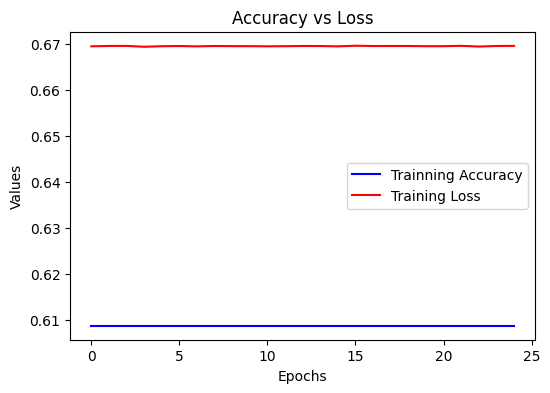

In [36]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color="blue",label="Trainning Accuracy")
plt.plot(range(0,len(epoch_loss)), epoch_loss, color="red", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.title("Accuracy vs Loss")
plt.legend()
plt.show()

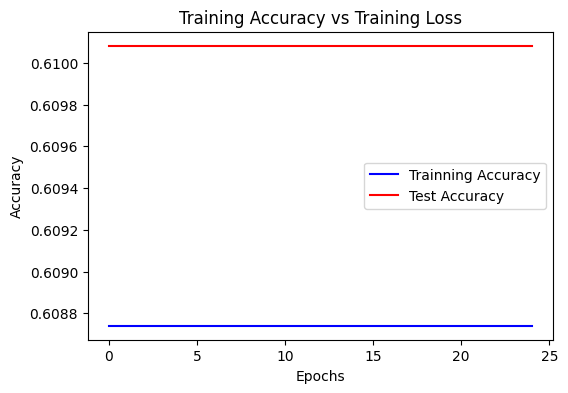

In [37]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color="blue",label="Trainning Accuracy")
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color="red", label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Training Loss")
plt.legend()
plt.show()

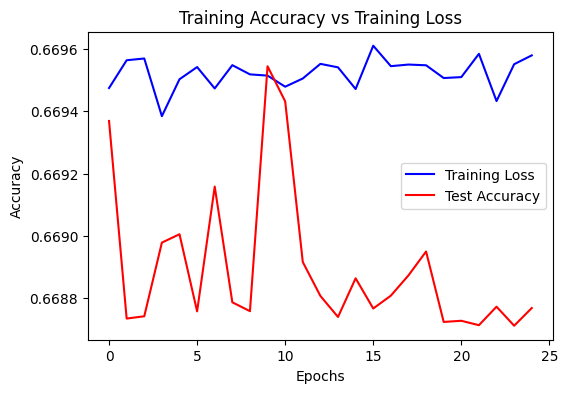

In [38]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color="blue",label="Training Loss")
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color="red", label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Training Loss")
plt.legend()
plt.show()

EVALUATION DU MODELS

In [39]:
# Predire les Sorties
y_pred = model.predict(X_test)
y_pred

979/979 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


array([[0.39515606],
       [0.39515606],
       [0.39515606],
       ...,
       [0.39515606],
       [0.39515606],
       [0.39515606]], dtype=float32)

Sauvegarder le modèle entrainé

In [40]:
model.save('model.h5')

Simple Prediction

In [41]:
sub_data.head()

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,0,451,13535,716000000,1,16,0
1,126395,134737070,2,0,451,13531,734000000,1,16,0
2,90333,96294978,2,1,451,13534,744000000,1,16,0
3,90333,96294978,2,1,451,13534,744000000,1,16,0
4,90333,96294978,2,1,451,13534,744000000,1,16,0


In [43]:
# Une simple prediction 
model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

NameError: name 'scaler' is not defined

In [ ]:
sub_data[sub_data['label'] == 1]

In [ ]:
# Une simple prediction 
model.predict(scaler.transform([[4777,	5092282,	2,	1,	0,	0,	711000000,	1,	16	]]))

In [ ]:
resultats_1 = model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

In [ ]:
resultats_2 = model.predict(scaler.transform([[4777,	5092282,	2,	1,	0,	0,	711000000,	1,	16	]]))

In [ ]:
resultats_2

In [ ]:
if resultats_2 > 0.5:
    print("Malign")
else :
    print("Benign")